<a href="https://colab.research.google.com/github/Aakash326/ML-models/blob/main/credit_card_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df=pd.read_csv('/content/creditcard.csv')

In [ ]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
data = df.sample(n=4000, replace=True,random_state=42)

In [ ]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
70550,53918,-3.938406,-1.590317,0.904244,-0.166187,0.315745,-1.367552,0.600503,-0.083828,0.694724,...,-0.630424,-0.511713,0.649247,0.456485,0.714789,0.849612,-0.280987,0.427467,116.13,0.0
7633,10561,-2.036930,0.502727,1.213190,3.269401,0.987165,-0.215683,0.694228,-0.046342,-0.428595,...,-0.274705,0.194984,0.770370,0.030288,0.588598,0.359133,-0.187383,-0.431021,53.89,0.0
15835,27283,-10.410270,-19.917165,-6.833829,4.398751,-6.914945,0.953082,7.946898,-1.911031,-1.721496,...,3.261073,-4.055161,-5.342157,0.723590,-1.942346,0.358646,-1.235022,1.066446,6130.21,0.0
67386,52509,-1.301442,-0.160169,1.811094,-0.848668,-0.543767,0.169490,-0.499921,0.877050,0.325123,...,0.012486,-0.186035,0.072546,0.065481,-0.155779,0.794024,-0.167239,-0.145019,54.05,0.0
58337,48337,-2.126521,-1.891289,1.377306,1.860316,1.980489,-1.300186,-1.533048,0.612966,0.555598,...,0.162416,-0.043437,0.323821,-0.132152,0.312383,-0.189457,0.227136,0.145882,56.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31466,36379,-1.635348,-1.174469,1.484537,1.714121,1.563374,-0.652747,-0.607978,0.441382,-0.288188,...,0.217934,0.148549,0.308430,-0.016446,-0.146904,-0.253832,0.090037,0.167145,63.00,0.0
97995,66473,-0.662377,1.003560,1.512428,0.383613,0.256217,-0.634224,0.970870,-0.136999,-0.201544,...,-0.004924,0.082259,-0.223360,0.399607,0.122203,-0.540617,-0.011858,0.139022,16.18,0.0
14238,25297,0.744290,-1.536171,0.337662,0.129199,-1.643995,-0.688488,-0.317656,-0.169936,-0.597298,...,-0.008592,-0.266995,-0.288706,0.409054,0.185452,0.630259,-0.067308,0.073011,323.50,0.0
80975,58743,1.068995,-2.160513,1.941657,-0.620383,-2.818579,0.789649,-2.156717,0.397701,-0.028224,...,0.030051,0.744058,-0.131209,0.474511,0.261108,0.094476,0.124266,0.057947,139.25,0.0


In [ ]:
data['Class'].value_counts()

,count
Class,
0.0,3994
1.0,6


In [ ]:
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,-0.022363,-0.058031,-0.043826,-0.025388,-0.032877,-0.041100,-0.025532,0.037579,-0.228245,...,0.028012,-0.005689,0.012280,-0.019517,0.026140,0.007400,0.024223,0.013277,0.023345,-0.018802
V1,-0.022363,1.000000,0.293849,0.250145,-0.109691,-0.076988,0.096360,0.061956,0.032676,-0.060036,...,-0.069084,0.011925,-0.049433,-0.024285,0.232481,0.031609,-0.052755,0.298546,-0.383111,-0.095377
V2,-0.058031,0.293849,1.000000,0.072654,-0.079324,-0.103109,0.111838,-0.072949,-0.020725,-0.028939,...,-0.239033,0.162460,0.046711,-0.011866,-0.064092,-0.011584,0.024529,0.304680,-0.677139,0.116043
V3,-0.043826,0.250145,0.072654,1.000000,-0.156209,0.113886,-0.055925,0.214202,-0.043330,0.149324,...,0.036345,0.245892,0.085727,0.037951,-0.132586,0.020936,-0.143652,0.050071,-0.309218,-0.335312
V4,-0.025388,-0.109691,-0.079324,-0.156209,1.000000,0.032645,-0.078216,0.013748,0.052256,-0.012148,...,0.102939,-0.036409,0.006518,-0.018173,-0.044798,-0.016996,0.044641,-0.098789,0.187666,0.217632
V5,-0.032877,-0.076988,-0.103109,0.113886,0.032645,1.000000,0.101359,0.053324,0.021436,0.062104,...,0.006669,-0.095153,0.148941,0.027294,0.087744,-0.082947,-0.046651,-0.159856,-0.242738,-0.116698
V6,-0.041100,0.096360,0.111838,-0.055925,-0.078216,0.101359,1.000000,-0.064160,-0.051861,0.063017,...,-0.024492,0.060468,-0.087188,0.042688,0.040167,0.019176,-0.040969,0.118755,0.088097,-0.056667
V7,-0.025532,0.061956,-0.072949,0.214202,0.013748,0.053324,-0.064160,1.000000,0.122544,0.063457,...,0.187476,-0.156728,-0.063990,0.012226,-0.141641,-0.057251,-0.206134,-0.040713,0.324432,-0.299210
V8,0.037579,0.032676,-0.020725,-0.043330,0.052256,0.021436,-0.051861,0.122544,1.000000,0.019083,...,0.286659,-0.049141,-0.038810,-0.009579,0.022599,0.017807,0.087892,0.013353,-0.066603,0.028115
V9,-0.228245,-0.060036,-0.028939,0.149324,-0.012148,0.062104,0.063017,0.063457,0.019083,1.000000,...,0.010522,0.027099,-0.082756,0.003191,0.082182,0.079958,-0.038208,-0.064487,-0.031010,-0.172927


In [ ]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
x=data.iloc[:,:-1]
y=data['Class']

In [ ]:
for col in x.columns:
    Q1 = x[col].quantile(0.25)
    Q3 = x[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    x[col] = np.where(x[col] < lower, lower,
                      np.where(x[col] > upper, upper, x[col]))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
scaler = StandardScaler()
x_train_norm = scaler.fit_transform(x_train)
x_test_norm = scaler.transform(x_test)

<Axes: >

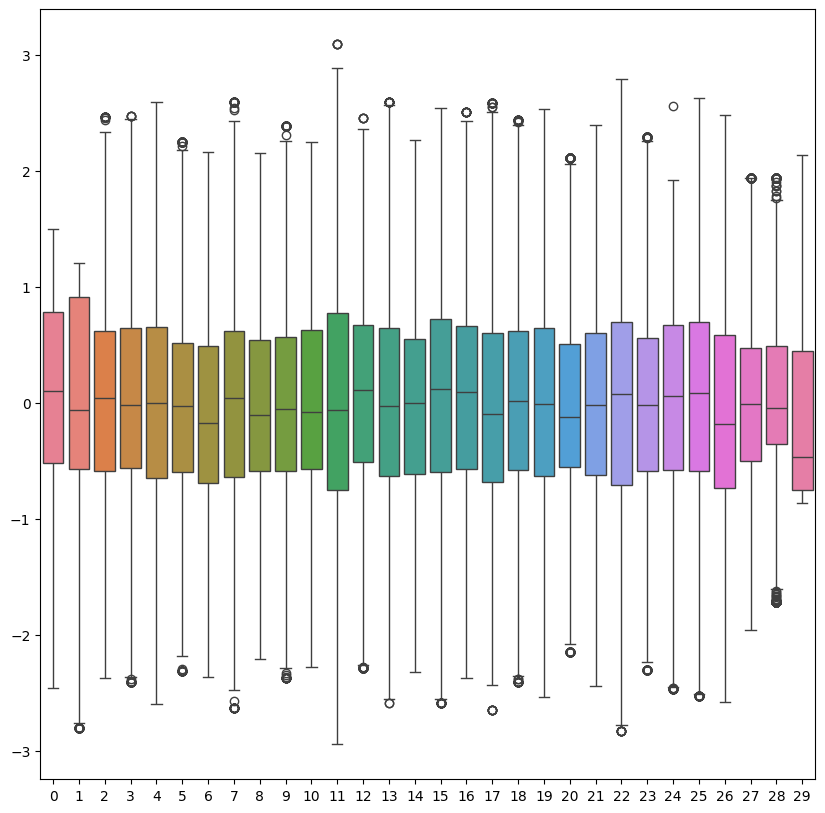

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(data=x_train_norm, ax=ax)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x_train_norm, y_train)

ValueError: Expected n_neighbors <= n_samples_fit, but n_neighbors = 6, n_samples_fit = 4, n_samples = 4

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42, k_neighbors=2)  # set k_neighbors ≤ 3
x_resampled, y_resampled = smote.fit_resample(x_train_norm, y_train)


In [ ]:
y_resampled.value_counts()

,count
Class,
0.0,1396
1.0,1396


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_resampled,y_resampled)

KNeighborsClassifier()

In [ ]:
y_pred=knn.predict(x_test_norm)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score # Added accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [ ]:
knn.score(x_test_norm,y_test)*100

100.0

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       600

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600

